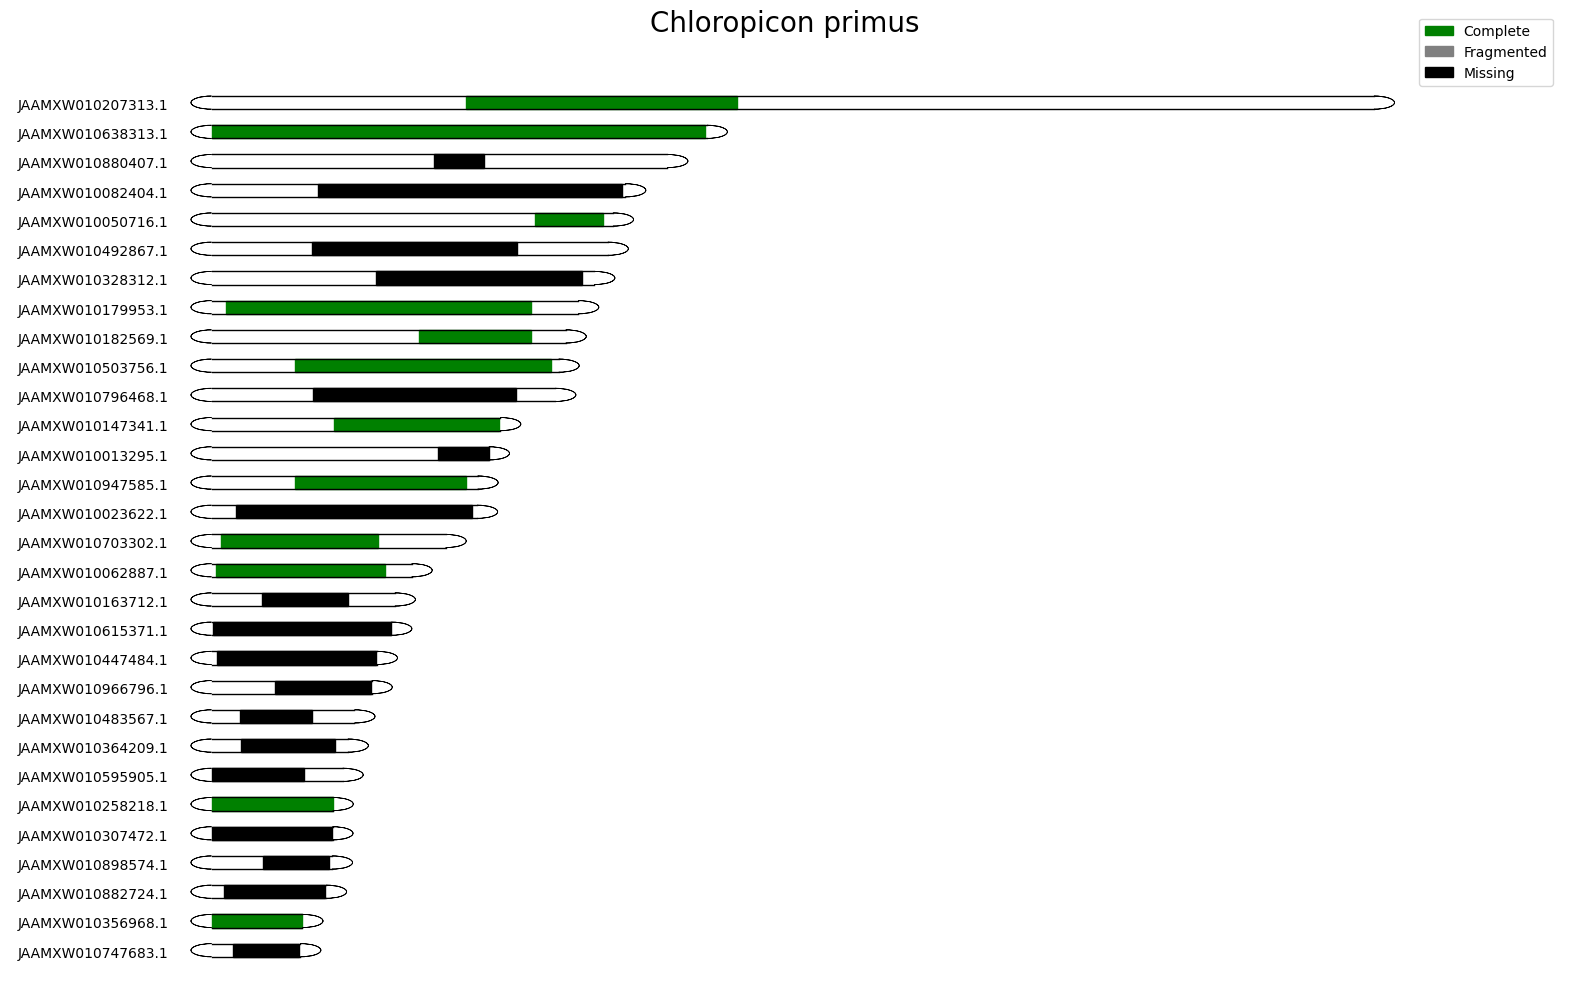

In [2]:
from buscoplotpy.karyoplot import karyoplot

karyoplot("/home/lorenzo/Documenti/bioswiftanalytics_test_data/busco_tmp/tree/Alveolata/Amphidinium_carterae/GCA_019702695.1/karyotype.tsv", 
          "/home/lorenzo/Documenti/bioswiftanalytics_test_data/busco_tmp/tree/Alveolata/Amphidinium_carterae/GCA_019702695.1/busco_out/run_alveolata_odb10/full_table.tsv", 
          "test1.png", "Chloropicon primus", chrs_limit=30, plt_show=True, palette="green")

In [1]:
# Importing libraries

import pandas as pd
import os
import json
import re
from buscoplotpy.organism_busco_barplot import organism_busco_barplot
from buscoplotpy.load_busco_fulltable import load_busco_fulltable
from buscoplotpy.load_json_summary import load_json_summary
from buscoplotpy.karyoplot import karyoplot

%matplotlib inline

# Insert the filename of the graph
filename = "BUSCO_barplot_results"

# Input directory
dir = "/home/lorenzo/Documenti/bioswiftanalytics_test_data/busco_tmp/tree"

directories = ['Stramenopiles']

busco_run_pattern = r'run*'

# Iterate on each superphylum group
for group in directories:
    os.chdir(dir + '/' + group)

    group_tmp = pd.DataFrame()

    # Iterate on each organism
    for organism in os.listdir():
            
        if os.path.isdir(organism):

            os.chdir(organism)

            # Create an empty dataframe
            organism_tmp = pd.DataFrame()

            # Iterate on each genome version
            for genome_version in os.listdir():

                if os.path.isdir(genome_version):
                    os.chdir(genome_version)
                    os.chdir('./busco_out')

                    for file in os.listdir():
                        if file.endswith(".json"):

                            version_tmp = load_json_summary(file)
                            version_tmp['group'] = group
                            version_tmp['organism'] = organism
                            version_tmp['version'] = genome_version

                            organism_tmp = pd.concat([organism_tmp, version_tmp], axis=0, ignore_index=True)

                    dirs = [d for d in os.listdir() if re.search(busco_run_pattern, d)]

                    os.chdir(dirs[0])

                    version_fulltable = load_busco_fulltable('full_table.tsv', group=group, organism=organism, genome_version=genome_version)

                    os.chdir('../..')
                    
                    karyoplot(karyotype_file='karyotype.tsv',
                              busco_fulltable=version_fulltable,
                              output_file='karyoplot.png',
                              title=group + ' ' + organism + ' ' + genome_version + ' karyotype',
                              chrs_limit=100,
                              dpi=300)
                    os.chdir('..')

            organism_busco_barplot(df=organism_tmp,
                                   out_path="./",
                                   filename=filename)
                
            group_tmp = pd.concat([group_tmp, organism_tmp], axis=0, ignore_index=True)

            os.chdir('..')

    organism_busco_barplot(df=group_tmp, out_path="./", filename=filename + '_all')
    organism_busco_barplot(df=group_tmp[group_tmp['complete'] >= 95.0], out_path="./", filename=filename + '_upto95')
    organism_busco_barplot(df=group_tmp[group_tmp['complete'] >= 90.0], out_path="./", filename=filename + '_upto90')
    organism_busco_barplot(df=group_tmp[group_tmp['complete'] >= 85.0], out_path="./", filename=filename + '_upto85')
    os.chdir('..')

In [7]:
from buscoplotpy.organism_busco_barplot import organism_busco_barplot
from buscoplotpy.load_busco_fulltable import load_busco_fulltable
from buscoplotpy.load_json_summary import load_json_summary
pd.set_option('display.max_columns', None)

dir = "/home/lorenzo/Documenti/bioswiftanalytics_test_data/busco_tmp/tree/Chlorophyta/Bathycoccus_prasinos_4/"

os.chdir(dir)

organism_tmp = pd.DataFrame()

for version in os.listdir(dir):
    if os.path.isdir(version):
        os.chdir(version)
        os.chdir('./busco_out')

        for file in os.listdir():
            if file.endswith(".json"):
                version_tmp = load_json_summary(file)
                version_tmp['group'] = 'Chlorophyta'
                version_tmp['organism'] = 'Bathycoccus_prasinos_4'
                version_tmp['version'] = version
                organism_tmp = pd.concat([organism_tmp, version_tmp], axis=0, ignore_index=True)

        os.chdir('..')
        os.chdir('..')


#organism_busco_barplot(df=group_tmp, out_path="./", filename=filename + '_all')

organism_tmp.head()

,max_intron,max_seq_len,metaeuk_parameters,metaeuk_rerun_parameters,contig_break,scaffold_composition,gene_predictor,dataset_name,number_of_buscos,number_of_species,metaeuk_version,bbtools_version,busco_version,hmmsearch_version,one_line_summary,complete,single copy,multi copy,fragmented,missing,n_markers,domain,number_of_scaffolds,number_of_contigs,total length,percent gaps,scaffold N50,contigs N50,group,organism,version
0,90000,120000,,,10,False,metaeuk,chlorophyta_odb10,1519,16,6.a5d39d9,39.01,5.4.7,3.1,"C:19.3%[S:19.2%,D:0.1%],F:0.9%,M:79.8%,n:1519",19.3,19.2,0.1,0.9,79.8,1519,eukaryota,625,930,2504736,0.129%,3912,3416,Chlorophyta,Bathycoccus_prasinos_4,GCA_029290765.1
1,90000,120000,,,10,False,metaeuk,chlorophyta_odb10,1519,16,6.a5d39d9,39.01,5.4.7,3.1,"C:61.3%[S:60.6%,D:0.7%],F:1.4%,M:37.3%,n:1519",61.3,60.6,0.7,1.4,37.3,1519,eukaryota,1615,2155,8892781,0.120%,5665,4915,Chlorophyta,Bathycoccus_prasinos_4,GCA_029293465.1
2,90000,120000,,,10,False,metaeuk,chlorophyta_odb10,1519,16,6.a5d39d9,39.01,5.4.7,3.1,"C:97.1%[S:96.7%,D:0.4%],F:0.7%,M:2.2%,n:1519",97.1,96.7,0.4,0.7,2.2,1519,eukaryota,21,41,15074320,0.240%,955652,663424,Chlorophyta,Bathycoccus_prasinos_4,GCA_002220235.1
3,90000,120000,,,10,False,metaeuk,chlorophyta_odb10,1519,16,6.a5d39d9,39.01,5.4.7,3.1,"C:33.2%[S:32.9%,D:0.3%],F:1.8%,M:65.0%,n:1519",33.2,32.9,0.3,1.8,65.0,1519,eukaryota,1179,1590,5409338,0.116%,4488,3949,Chlorophyta,Bathycoccus_prasinos_4,GCA_029290735.1


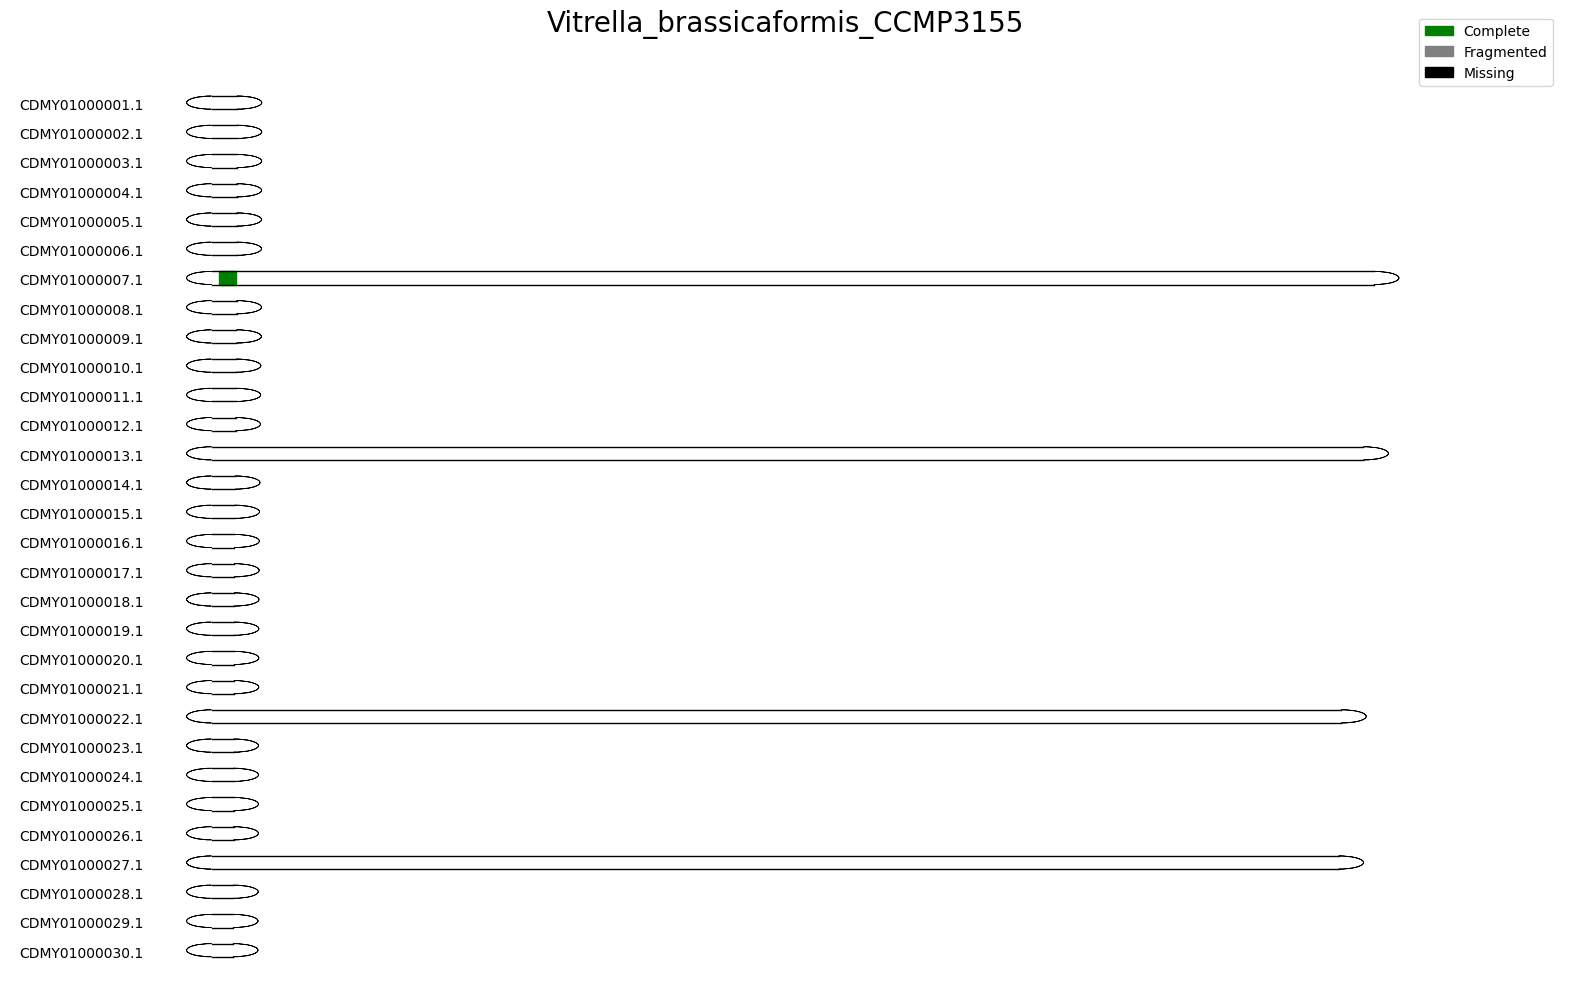

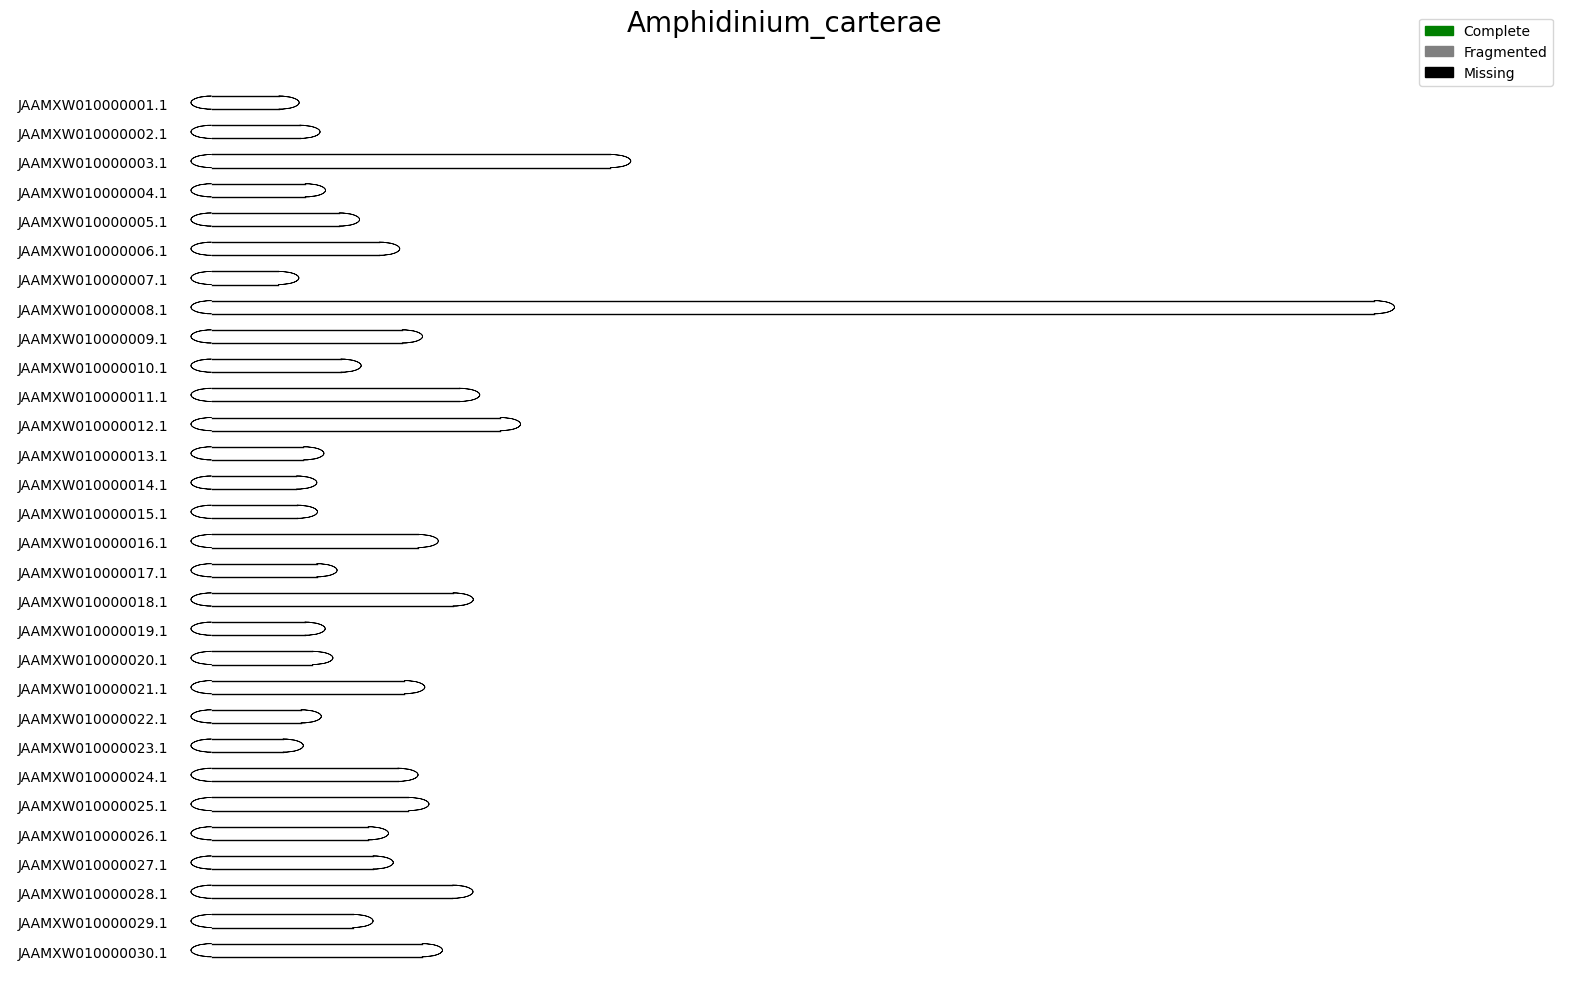

In [1]:
# Importing libraries

import pandas as pd
import os
import json
import re
from load_busco_fulltable import load_busco_fulltable
from karyoplot import karyoplot

%matplotlib inline

# Insert the filename of the graph
filename = "BUSCO_results"

# Input directory
dir = "/home/lorenzo/Documenti/microalghe/"

directories = ['Alveolata',]# 'Chlorophyta', 'Euglenozoa', 'Stramenopiles']

summary_features = [
    'id',
    'group',
    'organism',
    'version',
    'max_intron',
    'max_seq_len',
    'metaeuk_parameters',
    'metaeuk_rerun_parameters',
    'contig_break',
    'scaffold_composition',
    'gene_predictor',
    'dataset_name',
    'number_of_buscos',
    'number_of_species',
    'metaeuk_version',
    'bbtools_version',
    'busco_version',
    'hmmsearch_version',
    'one_line_summary',
    'complete',
    'single copy',
    'multi copy',
    'fragmented',
    'missing',
    'n_markers',
    'domain',
    'number_of_scaffolds',
    'number_of_contigs',
    'total length',
    'percent gaps',
    'scaffold N50',
    'contigs N50',
]

full_table_features = [
        'group',
        'organism',
        'genome_version',
        'busco_id',
        'status',
        'sequence',
        'gene_start',
        'gene_end',
        'strand',
        'score',
        'length',
        'ortho_db_url',
        'description',
]

i = 1

busco_run_pattern = r"run*"
json_pattern = r"*.json"
karyotype_pattern = r"karyotype.tsv$"

summary_data = pd.DataFrame(columns=summary_features)
fulltable_data = pd.DataFrame(columns=full_table_features)

# Iterate on each superphylum group
for group in directories:
    os.chdir(dir + group)

    # Iterate on each organism
    for organism in os.listdir():

        os.chdir(organism)

        # Iterate on each genome version
        for genome_version in os.listdir():

            os.chdir(genome_version)
            os.chdir('./busco_out')

            run_dirs = [d for d in os.listdir() if re.search(busco_run_pattern, d)]

            os.chdir(run_dirs[0])

            for file in os.listdir():
                if file.endswith(".json"):
                    with open(file, "r") as f:
                        dict = json.load(f)

                        summary_data.loc[len(summary_data)] = {
                            'id': i,
                            'group': group,
                            'organism': organism,
                            'version': genome_version,
                            'max_intron': dict['parameters']['max_intron'],
                            'max_seq_len': dict['parameters']['max_seq_len'],
                            'metaeuk_parameters': dict['parameters']['metaeuk_parameters'],
                            "metaeuk_rerun_parameters": dict['parameters']['metaeuk_rerun_parameters'],
                            "contig_break": dict['parameters']['contig_break'],
                            "scaffold_composition": dict['parameters']['scaffold_composition'],
                            "gene_predictor": dict['parameters']['gene_predictor'],
                            'dataset_name': dict['lineage_dataset']['name'],
                            'number_of_buscos': dict['lineage_dataset']['number_of_buscos'],
                            'number_of_species': dict['lineage_dataset']['number_of_species'],
                            'metaeuk_version': dict['versions']['metaeuk'],
                            'bbtools_version': dict['versions']['bbtools'],
                            'busco_version': dict['versions']['busco'],
                            'hmmsearch_version': dict['versions']['hmmsearch'],
                            'one_line_summary': dict['results']['one_line_summary'],
                            'complete': dict['results']['Complete'],
                            'single copy': dict['results']['Single copy'],
                            'multi copy': dict['results']['Multi copy'],
                            'fragmented': dict['results']['Fragmented'],
                            'missing': dict['results']['Missing'],
                            'n_markers': dict['results']['n_markers'],
                            'domain': dict['results']['domain'],
                            'number_of_scaffolds': dict['results']['Number of scaffolds'],
                            'number_of_contigs': dict['results']['Number of contigs'],
                            'total length': dict['results']['Total length'],
                            'percent gaps': dict['results']['Percent gaps'],
                            'scaffold N50': dict['results']['Scaffold N50'],
                            'contigs N50': dict['results']['Contigs N50']
                        }

                        tmp_table = load_busco_fulltable(os.getcwd() + '/full_table.tsv', group, organism, genome_version)

                        #fulltable_data = pd.concat([fulltable_data if not fulltable_data.empty else None, tmp_table])

                        os.chdir('../..')
                        
                        karyotype_file = [k for k in os.listdir() if re.search(karyotype_pattern, k)]

                        karyoplot(karyotype_file=karyotype_file[0], busco_fulltable=tmp_table, output_file=os.getcwd() + '/karyotype_plot.png', title=organism, dpi=300)

                        del tmp_table
                        
                        i += 1

                        f.close()

            os.chdir('..')
        os.chdir('..')
    os.chdir('..')

summary_data.reset_index(drop=True, inplace=True)
#fulltable_data.reset_index(drop=True, inplace=True)

# Saving the complete summary table in a csv file
#fulltable_data.to_csv("/home/lorenzo/Documenti/microalghe/microalghe_fulltable_" + filename + '.csv', index=False)
#summary_data.to_csv("/home/lorenzo/Documenti/microalghe/microalghe_summary_" + filename + '.csv', index=False)

In [10]:
import pandas as pd

# Assuming df1 and df2 are your two DataFrames
# df1 is the DataFrame you want to sort
# df2 contains the keys based on which you want to sort df1

# Example DataFrames
df1 = pd.DataFrame({'ID': [1, 2, 3, 4, 5, 6], 'Value': ['A', 'B', 'C', 'D', 'A', 'D']})
df2 = pd.DataFrame({'ID': [3, 1, 4, 2], 'Value': ['A', 'B', 'C', 'D']})

# Set the key column as the index for both DataFrames
#df2 = df1.set_index('Value')
df2 = df2.set_index('Value')

# Sort df1 based on the order of keys in df2
#sorted_df = df1.loc[df2.index]
#
## Reset the index if needed
#sorted_df = sorted_df.reset_index()

# Display the sorted DataFrame
df2.loc[['A', 'D']]

,ID
Value,
A,3
D,2


In [7]:
df1['Value'].value_counts().sort_values(ascending=False).index.to_list()[:2]

['A', 'D']

In [21]:
df = pd.read_csv("karyotype.tsv", sep='\t')
df

,Chr,Start,End
0,CP031034.1,0,1876603
1,CP031035.1,0,1764478
2,CP031036.1,0,1475055
3,CP031037.1,0,1467028
4,CP031038.1,0,1105792
5,CP031039.1,0,1089399
6,CP031040.1,0,832080
7,CP031041.1,0,802619
8,CP031042.1,0,781388
9,CP031043.1,0,755390


In [15]:
df.set_index('Chr', inplace=True)

In [18]:
c = df.loc[['CP031048.1', 'CP031051.1']].copy()

In [20]:
c.reset_index()

,Chr,Start,End
0,CP031048.1,0,580184
1,CP031051.1,0,477077
